# World Development Indicators

In this analysis, I will be analyzing world development data from the World Bank. The data set used below has been pulled from Kaggle and is slightly altered from the World Bank original data set, to simplify the analysis. <br>
World Bank Data: https://datacatalog.worldbank.org/search/dataset/0037712 <br>
Kaggle Data: https://www.kaggle.com/datasets/kaggle/world-development-indicators

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# Let's start by loading in our data set. 
data = pd.read_csv('/Users/husseinyelamin/desktop/world-development-indicators/Indicators.csv')

In [3]:
# Now let's do a rough overlook to understand the data set we are using. 
data.shape

(5656458, 6)

In [4]:
data.head(10) 

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [5]:
data.tail(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656448,Zimbabwe,ZWE,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,2015,5.0
5656449,Zimbabwe,ZWE,Tax payments (number),IC.TAX.PAYM,2015,49.0
5656450,Zimbabwe,ZWE,Time required to build a warehouse (days),IC.WRH.DURS,2015,448.0
5656451,Zimbabwe,ZWE,Time required to enforce a contract (days),IC.LGL.DURS,2015,410.0
5656452,Zimbabwe,ZWE,Time required to get electricity (days),IC.ELC.TIME,2015,106.0
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,36.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,90.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,242.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.3
5656457,Zimbabwe,ZWE,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,32.8


In [6]:
len(data['CountryName'].unique())
# While this may lead me to think I have 247 countries represented in the data set, the fact that "Arab World" is 
#grouped individually and listed as a country tells me the world bank treated aggregate regions as countries 
# as well. So let's see how many of those there are. 

247

In [7]:
# Let's change a setting to be able to view every row of unique values in the country name column and then view it. 
pd.set_option('display.max_rows', None) # this is just to have it display all the rows in my next command
data.CountryName.unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics',
       'East Asia & Pacific (all income levels)',
       'East Asia & Pacific (developing only)', 'Euro area',
       'Europe & Central Asia (all income levels)',
       'Europe & Central Asia (developing only)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'High income: nonOECD', 'High income: OECD',
       'Latin America & Caribbean (all income levels)',
       'Latin America & Caribbean (developing only)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa (all income levels)',
       'Middle East & North Africa (developing only)', 'Middle income',
       'North America', 'OECD members', 'Other small states',
       'Pacific island small states', 'Small states', 'South Asia',
       'Sub-Saharan Afr

In [8]:
pd.set_option('display.max_rows', 10) # this is to return to the default setting of displaying the first 10 rows

In [9]:
# Now let's try and remove the non country values from the data 
list = ['Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faeroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Ireland', 'Isle of Man', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kiribati', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Kosovo', 'Kuwait',
       'Kyrgyz Republic', 'Lao PDR', 'Latvia', 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Macao SAR, China', 'Macedonia, FYR', 'Madagascar', 'Malawi',
       'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands',
       'Mauritania', 'Mauritius', 'Mexico', 'Micronesia, Fed. Sts.',
       'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco',
       'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands',
       'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria',
       'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau',
       'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania',
       'Russian Federation', 'Rwanda', 'Samoa', 'San Marino',
       'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Seychelles', 'Sierra Leone', 'Singapore',
       'Sint Maarten (Dutch part)', 'Slovak Republic', 'Slovenia',
       'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan',
       'Spain', 'Sri Lanka', 'St. Kitts and Nevis', 'St. Lucia',
       'St. Martin (French part)', 'St. Vincent and the Grenadines',
       'Sudan', 'Suriname', 'Swaziland', 'Sweden', 'Switzerland',
       'Syrian Arab Republic', 'Tajikistan', 'Tanzania', 'Thailand',
       'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia',
       'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu',
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela, RB', 'Vietnam', 'Virgin Islands (U.S.)',
       'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']
len(list) # this will yield the true number of countries represented in this data set. 

214

In [143]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 10)
data.head(10000).IndicatorName.unique()

array(['Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)',
       'Age dependency ratio, young (% of working-age population)',
       'Arms exports (SIPRI trend indicator values)',
       'Arms imports (SIPRI trend indicator values)',
       'Birth rate, crude (per 1,000 people)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'CO2 emissions from solid fuel consumption (% of total)',
       'Death rate, crude (per 1,000 people)',
       'Fertility rate, total (births per woman)',
       'Fixed telephone subscriptions',
       'Fixed telephone subscriptions (per 100 people)',
       'Hospital beds (per 1,000 people)',
       'Inter

In [144]:
# Let's start viewing changes in rates of poverty over time. First I want to view data from 
# 1960, 1980, 2000 and 2008. 
# I had to choose 2008 instead of 2015 for this analysis because it is the most recent year with a value for GDP

DateFilter = [1960, 1980, 2000, 2008]
CountryFilter = 'World'
ColumnFilter = ["Death rate, crude (per 1,000 people)",
                'Life expectancy at birth, total (years)',
                'Mortality rate, adult, female (per 1,000 female adults)',
                'Mortality rate, adult, male (per 1,000 male adults)',
                'Mortality rate, infant (per 1,000 live births)',
                'Mortality rate, under-5 (per 1,000)', 
                "Number of under-five deaths",
                'Survival to age 65, female (% of cohort)', 
                'Survival to age 65, male (% of cohort)', 
                'GDP per capita (current US$)', 
                'GDP per capita (constant 2005 US$)']
filtermesh = (data['CountryName'] == CountryFilter) & (data['IndicatorName'].isin(ColumnFilter) & (data['Year'].isin(DateFilter)))
worlddata = data.loc[filtermesh]

In [145]:
worlddata

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3393,World,WLD,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1960,1.775111e+01
3404,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,3.066333e+03
3405,World,WLD,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,4.502895e+02
3419,World,WLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,5.249984e+01
3447,World,WLD,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,1960,2.945495e+02
...,...,...,...,...,...,...
4502281,World,WLD,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2008,4.010000e+01
4502283,World,WLD,"Mortality rate, under-5 (per 1,000)",SH.DYN.MORT,2008,5.580000e+01
4502352,World,WLD,Number of under-five deaths,SH.DTH.MORT,2008,7.506143e+06
4502461,World,WLD,"Survival to age 65, female (% of cohort)",SP.DYN.TO65.FE.ZS,2008,7.785853e+01


In [146]:
xdatafilter = (worlddata['IndicatorName'] == 'GDP per capita (current US$)')
xdata = worlddata.loc[xdatafilter]
xdata

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3405,World,WLD,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,450.289472
1022131,World,WLD,GDP per capita (current US$),NY.GDP.PCAP.CD,1980,2514.185986
3190032,World,WLD,GDP per capita (current US$),NY.GDP.PCAP.CD,2000,5443.400043
4502083,World,WLD,GDP per capita (current US$),NY.GDP.PCAP.CD,2008,9331.420143


In [147]:
ydatafilter = (worlddata['IndicatorName'] == 'Mortality rate, infant (per 1,000 live births)')
ydata = worlddata.loc[ydatafilter]
ydata

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3449,World,WLD,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1960,121.9
1022238,World,WLD,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1980,80.0
3190215,World,WLD,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2000,53.1
4502281,World,WLD,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2008,40.1


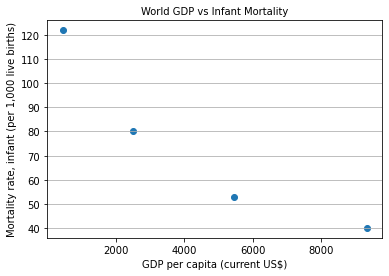

In [148]:
fig, axis = plt.subplots()
axis.yaxis.grid(True) 
axis.set_title('World GDP vs Infant Mortality',fontsize=10) 
axis.set_xlabel(xdata['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(ydata['IndicatorName'].iloc[0],fontsize=10)

X = xdata['Value'] 
Y = ydata['Value']

axis.scatter(X, Y)

In [159]:
np.corrcoef(xdata['Value'], ydata['Value'])

array([[ 1.        , -0.93230178],
       [-0.93230178,  1.        ]])

In [149]:
y2datafilter = (worlddata['IndicatorName'] == 'Death rate, crude (per 1,000 people)')
y2data = worlddata.loc[y2datafilter]
y2data

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3393,World,WLD,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1960,17.751115
1022089,World,WLD,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1980,10.265409
3189972,World,WLD,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,2000,8.548635
4502017,World,WLD,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,2008,8.098338


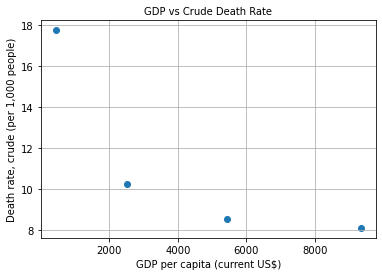

In [150]:
fig, axis = plt.subplots()
axis.yaxis.grid(True)
axis.xaxis.grid(True) 
axis.set_title('GDP vs Crude Death Rate', fontsize=10)
axis.set_xlabel(xdata['IndicatorName'].iloc[0], fontsize=10)
axis.set_ylabel(y2data['IndicatorName'].iloc[0], fontsize=10)

X = xdata['Value']
Y = y2data['Value']

axis.scatter(X, Y)

In [160]:
np.corrcoef(xdata['Value'], y2data['Value'])

array([[ 1.        , -0.81261562],
       [-0.81261562,  1.        ]])

In [151]:
y3datafilter = (worlddata['IndicatorName'] == 'Life expectancy at birth, total (years)')
y3data = worlddata.loc[y3datafilter]
y3data

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3419,World,WLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,52.499842
1022201,World,WLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1980,62.913617
3190161,World,WLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2000,67.704878
4502227,World,WLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2008,69.917220


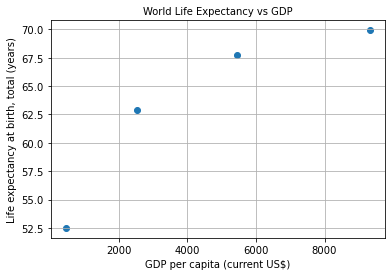

In [154]:
fig, axis = plt.subplots()
axis.xaxis.grid(True)
axis.yaxis.grid(True)
axis.set_title('World Life Expectancy vs GDP', fontsize=10)
axis.set_xlabel(xdata['IndicatorName'].iloc[0], fontsize=10)
axis.set_ylabel(y3data['IndicatorName'].iloc[0], fontsize=10)

X = xdata['Value']
Y = y3data['Value']

axis.scatter(X, Y)

fig.savefig("WorldLifeExpectancyvsGDP.png")

In [161]:
np.corrcoef(xdata['Value'], y3data['Value'])

array([[1.        , 0.90025829],
       [0.90025829, 1.        ]])